## ETL PRACTICA - JOSÉ ANDRÉS

### En está práctica se trata la adquisición y recogida en un CSV de los valores que tienen en este momento las criptomonedas, la utilización de Beautiful Soup, una biblioteca de Python para analizar documentos HTML y el paquete de python pandas, que proporciona estructuras de datos similares a los dataframes de R. 

### Además se busca solucionar un problema que puede darse al utilizar dicha biblioteca cuando se produce el error 403 un código de estado HTTP que indica que el servidor se denega a permitir la acción solicitada.

## Criptomoneda

La criptomoneda, también llamada moneda virtual o criptodivisa, es dinero digital. Eso significa que no hay monedas ni billetes físicos — todo es en línea. Usted puede transferirle una criptomoneda a alguien en internet sin un intermediario, como un banco. Las criptomonedas más conocidas son Bitcoin y Ether, pero se continúan creando nuevas cripto-monedas.

La gente podría usar criptomonedas para hacer pagos rápidos y para evitar los cargos de transacción. Algunas personas podrían adquirir criptomonedas como una inversión, con la esperanza de que aumente su valor. Las criptomonedas se pueden comprar con una tarjeta de crédito o, en algunos casos, a través de un proceso llamado “minería”. Las criptomonedas se almacenan en un monedero o cartera digital, ya sea en línea, en su computadora o en otro soporte físico.

Antes de comprar una criptomoneda, tiene que saber que no tiene las mismas protecciones que cuando usa dólares estadounidenses. También tiene que saber que los estafadores le están pidiendo a la gente que le paguen con una criptomoneda porque saben que, por lo general, esos pagos son irreversibles.

## Instalación Librerías

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Contacto al servidor con la petición get

Se prueba la petición y aparecer el error 403 que significa que la petición es correcta pero el servidor se niega a ofrecerte el recurso o página web. La librería requests nos permite enviar solicitudes HTTP con Python

In [2]:
paginaScrap = "http://investing.com"

page = requests.get(paginaScrap)
print(page)

<Response [403]>


Como nos sale el error 403 podemos realizar una forma para "trucar" y conseguir que nos deje entrar en la página. Para ello debemos entrar en la parte de red en herramientas de desarrollo e introducir los siguientes datos:

In [3]:
Url = "http://investing.com"

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
page = requests.get(Url, headers=headers)

print(page)

<Response [200]>


### Se obtiene el Título de la Página:

In [4]:
soup = BeautifulSoup(page.text, "html.parser")
soup.title.string

'Investing.com - Stock Market Quotes & Financial News'

### Se obtiene el valor de la criptomoneda por excelencia en este mercado: 

In [5]:
tabla_Crypto = soup.find(class_='genTbl js-all-crypto-preview-table wideTbl elpTbl elp20 topCryptoHP')
tr_all = tabla_Crypto.find_all('tr',{'i': '1057391'})

Precio = tr_all[0].find_all('td',{'class':'price js-currency-price'})

print("------------------")
print("Valor en Bitcoin (USD): {0}".format(Precio[0].get_text()))
print("------------------")

------------------
Valor en Bitcoin (USD): 52,465.5
------------------


### Se obtienen los valores de las diferentes criptomonedas más representativas en la actualidad: 

In [6]:
tabla_Crypto = soup.find(class_='genTbl js-all-crypto-preview-table wideTbl elpTbl elp20 topCryptoHP')

tr_all = tabla_Crypto.find_all('tr')

for sub_tr in tr_all: 
    Precio = sub_tr.find_all('td',{'class':'price js-currency-price'})
    Nombre = sub_tr.find_all('td',{'class':'left bold elp name cryptoName first js-currency-name'})
    
    if(Nombre!=[]):
        print("------------------")
        print('Valor en {0} (USD): {1}'.format(Nombre[0].get_text(),Precio[0].get_text()))

------------------
Valor en Bitcoin (USD): 52,465.5
------------------
Valor en Ethereum (USD): 1,922.33
------------------
Valor en Binance Coin (USD): 273.5819
------------------
Valor en Tether (USD): 1.0007
------------------
Valor en Polkadot (USD): 33.5199


### Se crea un DataFrame para visualizarlo mejor y se exporta en un CSV para trabajar y recoger dichos valores en un periodo de tiempo.

In [7]:
tabla_Crypto = soup.find(class_='genTbl js-all-crypto-preview-table wideTbl elpTbl elp20 topCryptoHP')
tr_all = tabla_Crypto.find_all('tr')

ListaSave=[]
for sub_tr in tr_all: 
    Precio = sub_tr.find_all('td',{'class':'price js-currency-price'})
    Nombre = sub_tr.find_all('td',{'class':'left bold elp name cryptoName first js-currency-name'})
    if(Nombre!=[]):
        ListaSave.append([Nombre[0].get_text(),Precio[0].get_text().replace(",", "")])
        
print(ListaSave)

[['Bitcoin', '52465.5'], ['Ethereum', '1922.33'], ['Binance Coin', '273.5819'], ['Tether', '1.0007'], ['Polkadot', '33.5199']]


In [8]:
import pandas as pd

df = pd.DataFrame(ListaSave, columns= ['Criptomoneda', 'Precio'])

df.sort_values(by='Precio', ascending=True)

df

,Criptomoneda,Precio
0,Bitcoin,52465.5
1,Ethereum,1922.33
2,Binance Coin,273.5819
3,Tether,1.0007
4,Polkadot,33.5199


Como los valores del precio de cada moneda se han introducido como tipo string se tienen que pasar a un tipo float para que se pueda ordenar de mayor a menor atendiendo al valor que tienen en este momento en el mercado.

In [9]:
df['Precio'] = df['Precio'].astype(float)

In [10]:
df = df.sort_values(by='Precio', ascending=False)


In [11]:
df

,Criptomoneda,Precio
0,Bitcoin,52465.5000
1,Ethereum,1922.3300
2,Binance Coin,273.5819
4,Polkadot,33.5199
3,Tether,1.0007


In [12]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='Criptomoneda'>

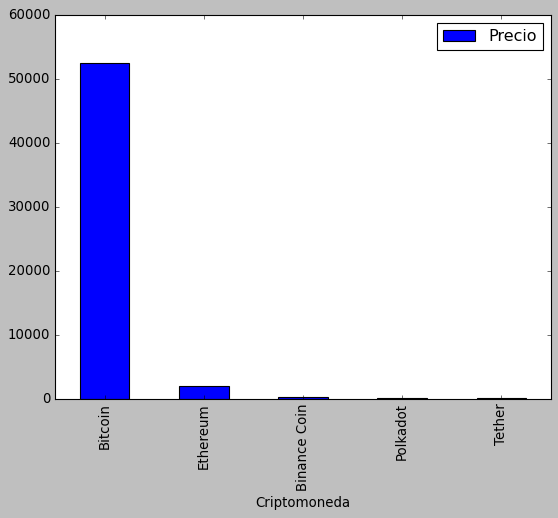

In [13]:
df.plot(kind='bar',x='Criptomoneda',y='Precio')

## Exportamos los datos en un CSV:

In [14]:
df.to_csv(r'Criptomonedas.csv', index = False)